# Resposta Em Frequência


## Decibel

O decibel é uma medida de ganho em escala logarítmica. Em um sistema com entrada $V_i$ e saída $V_o$,, a potência de entrada $P_i$ é proporcional ao quadrado da tensão de entrada, assim como a potência de saída $P_o$ é proporcional ao quadrado da tensão de saída. O ganho de potência é definido como 

$$G=\frac{P_o}{P_i}$$

e o ganho em decibéis é

$$G(dB)=10 \log\frac{P_o}{P_i}$$

O Ganho em tensão é definido como

$$G_{V}(dB)=20\log \frac{V_o}{V_i}$$


## Diagramas de Bode

Diagramas de Bode são gráficos de ganho e fase em função da frequência, em escala logarítmica. O ganho é dado em decibéis

$$G_V(dB)=20\log \|H(j\omega)\|$$

enquanto o gráfico de fase mostra a variação do ângulo em graus ou radianos, segundo a frequência. 

**Exemplo** neste primeiro exemplo analisamos a resposta em frequência de um filtro $RC$ passa baixas de primeira ordem incluindo os diagramas de Bode:

In [1]:
from lcapy import *
a=Circuit("""
P1 1 0; down 
R 1 2 ; right=1.2
C 2 0_2 ; down
W 0 0_2; right
W 2 3; right
W 0_2 0_3; right
P2 3 0_3; down""")

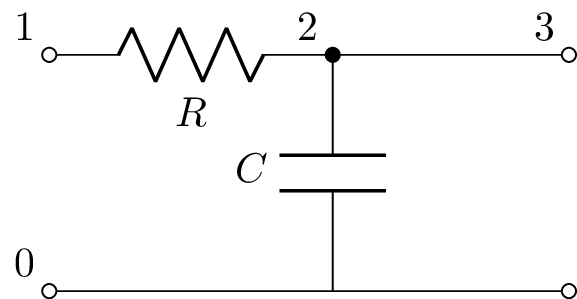

In [2]:
a.draw()

In [3]:
H = a.transfer(1, 0, 3, 0)
H

    1    
─────────
C⋅R⋅s + 1

In [4]:
Hw=H(jomega)
Hw

     1     
───────────
ⅉ⋅C⋅R⋅ω + 1

onde $\tau=RC$ é a constante de tempo. Vamos analisar a resposta em frequência.

In [5]:
Hm=abs(Hw)
Hm

        1        
─────────────────
   ______________
  ╱  2  2  2     
╲╱  C ⋅R ⋅ω  + 1 

Substituindo $R=2\;\Omega$ e $C= \frac{1}{4}$ farads, podemos fazer o gráfico dos diagramas de Bode de módulo e fase da função de transferência.

In [6]:
Hr=H.subs({'R':2,'C':0.25}).simplify()
Hr

  2  
─────
s + 2

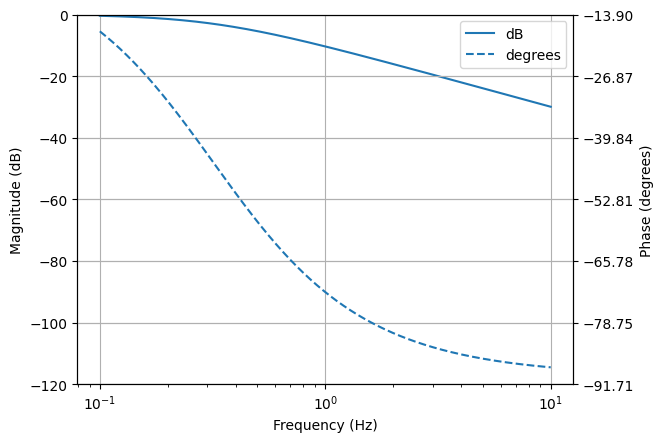

In [7]:
Hr(f).bode_plot((0, 10), plot_type='dB-degrees');

In [8]:
Hm.subs({'R':2,'C':0.25,'omega':2}).simplify()

√2
──
2 

Um filtro composto de elementos passivos não contém elementos amplificadores e não tem ganho de sinal. Assim  o módulo da máxima resposta em frequência é 1, que em decibéis corresponde a 0 $dB$.
Em $\omega=2\;\frac{rad}{s}$, ou $f\approx 0.32\; Hz$, $|H(j\omega)|=\frac{1}{\sqrt{2}}$ e portanto o ganho em potência do filtro é $\frac{1}{2}$, ou seja, a potência de saída é a metade da potência de entrada. Por este motivo, esta frequência é denominada como frequência de corte $\omega_c$, ou $f_c$. Além disso, a frequência de corte corresponde ao polo da função de transferência. A faixa de frequências inferiores a frequência de corte é a banda passante do filtro. O ganho em decibéis na frequëncia de corte é $20\log\frac{1}{2}=-3dB$.

Considere a função de transferência de um sistema de primeira ordem com ganho unitário, isto é

\begin{equation}
H(s)=\frac{1}{1+\tau s}=\frac{\frac{1}{\tau}}{s+\frac{1}{\tau}}.
\end{equation}

A resposta em frequência é então dada por

\begin{equation}
H(j\omega)=\frac{\frac{1}{\tau}}{j\omega+\frac{1}{\tau}},
\end{equation}

cujo módulo é

\begin{equation}
\|H(j\omega)\|=\frac{\frac{1}{\tau}}{\sqrt{\omega^2+\frac{1}{\tau^2}}},
\end{equation}


e por isso, para $\omega=\frac{1}{\tau}$ teremos $\|H(j\omega)\|=\frac{1}{\sqrt{2}}$. Daí, $\omega=\frac{1}{\tau}=\omega_c$ é a frequência de corte do sistema. Para o filtro $RC$ acima (out[5]) o módulo da resposta em frequência é 
$$\|H(j\omega)\|=\frac{1}{\sqrt{1+\omega^2R^2C^2}},$$ 

e portanto

$$\omega_c=\frac{1}{RC}=\frac{1}{\tau},$$

e a resposta em frequência pode ser escrita como

$$H(j\omega)=\frac{1}{1+j\frac{\omega}{\omega_c}}.$$

Para uma frequência muito maior que a frequência de corte, como $\omega=10\;\omega_c=\frac{10}{RC}$, o ganho em decibéis será

$$20\log\|\frac{1}{1+j10}\|=-20\log \|1+j10\|\approx -20log(10)=-20 dB$$

O filtro de primeira ordem (na verdade, isso vale para todo sistema com polo de primeira ordem) apresenta uma atenuação de aproximadamente 20 dB por década (Intervalo no qual a frequência superior é 10 vezes a frequência inferior). Da mesma forma se um sistema apresenta um zero de primeira ordem, a este zero corresponderá um  crescimento de 20 DB por década. Além disso, a variação de fase do filtro (correspondente aquela de um polo de primeira ordem) é

$$\angle H(j\omega)=\arctan\frac{0}{1}-\arctan\frac{10}{1}=-84.29^0\approx -90^o $$

o polo de primeira ordem causará um atraso de fase de aproximadamente $90^o$ por década ( o zero de primeira ordem resultará em um avanço de fase de $90^0$ por década).

Além disso, pode acontecer de a função de transferência possuir um polo de ordem zero, ou polo na origem (zero de na orígem). como em 
\begin{equation}
H(s)=\frac{K}{s(s+a)}
\end{equation}
com resposta em frequência de módulo
\begin{equation}
\|H(j\omega\|=20 \log K +20 \log \|\frac{1}{j\omega}\| +20\log \|\frac {1}{j\omega+a}\|
\end{equation}

na expressão acima, o último termo corresponde ao polo de primeira ordem analisado anteriormente. O primeiro termo corresponde ao ganho máximo do sistema. Para *K=1* este ganho é de 0 dB. Para o segundo termo, ao qual corresponde um polo na origem, a amplitude do ganho correspondente é 

\begin{equation}
20\log \|\frac{1}{j\omega}\|=-20 \log (\omega)
\end{equation}

Para $\omega=0.1$, $-20 \log (\omega)=20 dB$, para $\omega=0$, $-20 \log (\omega)=0 dB$ e para $\omega=10$, $-20 \log (\omega)=-20 dB$. Portanto a curva de ganho pode ser aproximada por uma reta ligando os pontos (0.1,20),(1,0) e (10,-20) no diagrama de Bode, uma reta de inclinação de -20 dB por década assim como uma defasagem constante de $-90^o$ (para um zero na origem termeos uma reta com inclinação de $20 dB$ com fase constante de $90^o$). Veja o exemplo abaixo. 

In [9]:
H=tf(1,[1,0])
H

1
─
s

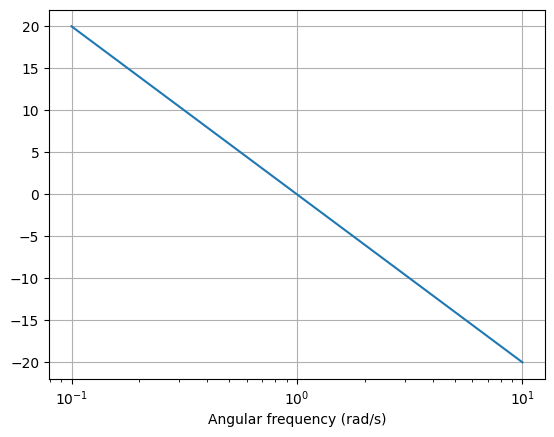

In [10]:
H(jw).dB.plot((0, 10), log_frequency=True);

**Exemplo** Filtro $RC$ passa-baixas de segunda ordem. O circuito utiliza dois estágios $RC$ em cascata, para formar um sistema com polos de segunda ordem com uma atenuação mais rápida que o filtro do exemplo anterior. 

In [11]:
from lcapy import *

a=Circuit("""
P1 1 0; down
R1 1 2 ; right=1.3
C1 2 0a ; down
R2 2 3 ; right=1.3
C2 3 0b ; down
W 0 0a; right=1.3
W 0a 0b; right=1.3
W 3 3a; right
W 0b 0c; 
P2 3a 0c; down
; draw_nodes=none, label_nodes=none""")

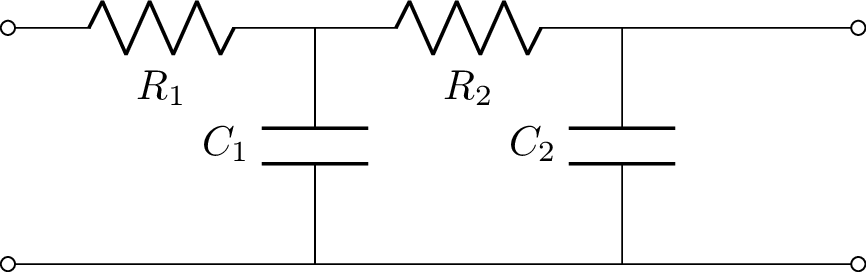

In [12]:
a.draw()

In [13]:
H=a.transfer('P1','P2')
H.canonical()

               ⎛     1     ⎞                
               ⎜───────────⎟                
               ⎝C₁⋅C₂⋅R₁⋅R₂⎠                
────────────────────────────────────────────
 2   s⋅(C₁⋅R₁ + C₂⋅R₁ + C₂⋅R₂)        1     
s  + ───────────────────────── + ───────────
            C₁⋅C₂⋅R₁⋅R₂          C₁⋅C₂⋅R₁⋅R₂

In [14]:
Hv = H.subs({'R1':10e3, 'C1':100e-9, 'R2':10e3, 'C2':1e-9})

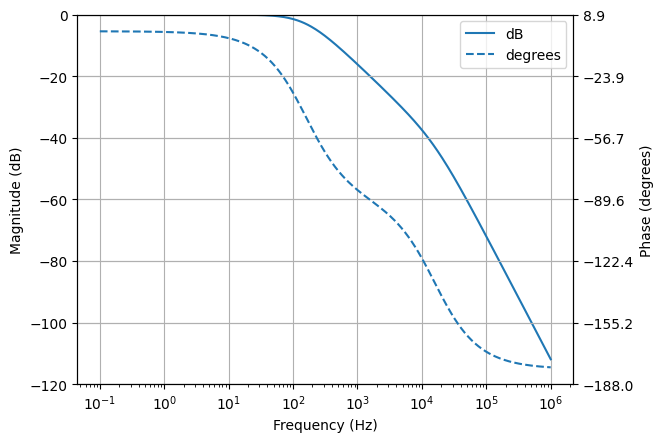

In [15]:
Hv(f).bode_plot((0, 1e6), plot_type='dB-degrees');

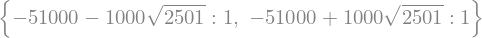

In [16]:
Hv.poles()

O par de polos corresponde às duas frequências de corte, $f_{c1}=157.6 $ Hz e $f_{c2}=16.1$ kHz. Estas frequências podem ser percebidas no diagrama acima, onde o amortecimento do filtro tem inclinação de -20 dB por década a partir de $f_{c1}$, e -40 dB por década a partir de $f_{c2}$. Para que o amortecimento com inclinação de -40 dB ocorra após a primeira frequência de corte, precisamos aproximar os dois polos de forma semelhante a uma função de transferência com  um polo de segunda ordem. Isso pode ser feito com o aumento da capacitância de $C_2$ para 100nF, por exemplo:

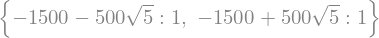

In [17]:
Hv2 = H.subs({'R1':10e3, 'C1':100e-9, 'R2':10e3, 'C2':100e-9})
Hv2.poles()

Os polos correspondem as frequências de 61 Hz e 417 Hz, suficientemente próximas para que o diagrama de Bode mostre uma curva suave com inclinação de aproximadamente 40 dB por década a partir da frequência de corte.

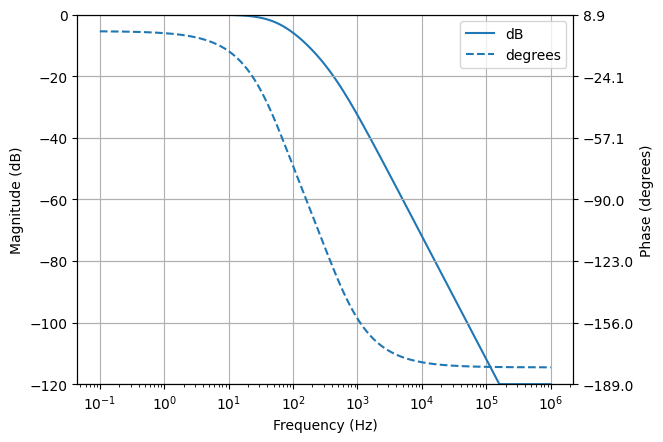

In [18]:
Hv2(f).bode_plot((0, 1e6), plot_type='dB-degrees');

Para analisar o diagrama acima, vamos recordar a função de transferência geral do sistema de segunda ordem

$$ H(s)=\frac{K\omega_n^2}{s^2+2\zeta\omega_n+\omega_n^2}$$

e comparar com a função de transferência do filtro $RC$ de segunda ordem

$$H(s)=\frac{\frac{1}{C_1C_2R_1R_2}}{s^2+\frac{(C_1R_1+C_2R_1+C_2R_2)}{C_1C_2R_1R_2}s+\frac{1}{C_1C_2R_1R_2}}$$

Desta forma, obtemos $K=1\;\mbox{e}\;\omega_n=\frac{1}{\sqrt{C_1C_2R_1R_2}}$. O filtro tem ganho máximo igual a 1, como pode ser visto no diagrama de Bode em baixas frequências. Novamente, para a determinação da resposta em frequência podemos analisar a expressâo geral

$$H(s)=\frac{\omega_n^2}{\omega_n^2(\frac{1}{\omega_n^2}s^2+\frac{2\zeta}{\omega_n}s+1)}=\frac{1}{\frac{1}{\omega_n^2}s^2+\frac{2\zeta}{\omega_n}s+1}$$

Desta forma, substituindo $s=j\omega$,o ganho em decibéis é dado por

$$G_V(dB)=20\log(1)-20\log\|\frac{(j\omega)^2}{\omega_n^2}+\frac{2\zeta}{\omega_n}j\omega+1\|$$

Para $\omega=10\omega_n$, o ganho é aproximadamente dado por

$$20\log\|H(j\omega)\|\approx-20\log\|\frac{(j\omega)^2}{\omega_n^2}\|=-20\log\left(\frac{10\omega_n}{\omega_n}\right)^2=-40\;\mbox{dB}$$

e a fase é

$$\angle(H(j\omega))=-\arctan(\frac{2\zeta\frac{\omega}{\omega_n}}{1-(\frac{\omega}{\omega_n})^2})$$

E para $\omega \gg \omega_n$ ($\omega =10 \omega_n$),

$$\angle(H(j\omega)) \approx -180^o.$$

Concluimos que o filtro de segunda ordem tem um amortecimento com inclinação de -40 dB por década, além de apresentar um atraso de fase de $180^o$ por década. Esses resultados podem ser confirmados no diagrama de Bode mostrado acima. A frequência de corte é  $\omega_c=\omega_n=\frac{1}{\sqrt{R_1R_2C_1C_2}}$. Substituindo os valores do último exemplo resulta em aproximadamente 160 Hz.

**Exemplo** neste último exemplo, vamos estudar o diagrama de Bode para um sistema representado pela função de transferência

$$H(s)=\frac{100}{s^2+2s+100}$$

In [19]:
H=tf(100,[1,2,100])
H

     100      
──────────────
 2            
s  + 2⋅s + 100

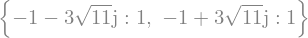

In [20]:
H.poles()

os polos são complexos, o que significa que o sistema é subamortecido e $\zeta < 1$. Comparando o denominador de $H(s)$ com o de um sistema de segunda ordem padrão,

$$s^2+2s+100=s^2+2\zeta\omega_n+\omega_n^2,$$

podemos verificar que $\omega_n=10$ e $\zeta=0,1$. 

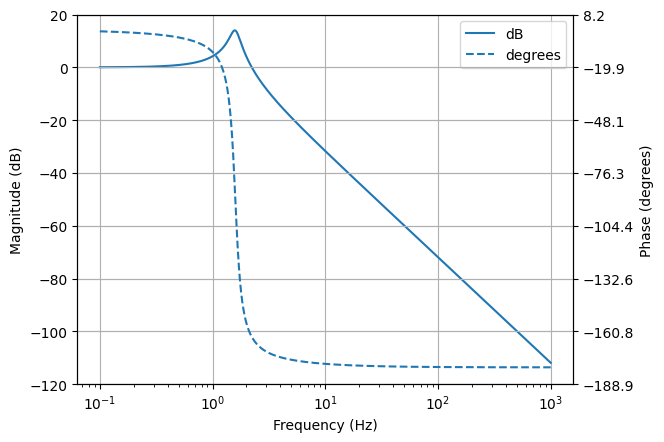

In [21]:
H(f).bode_plot((0, 1e3), plot_type='dB-degrees');

Aumentando o valor de $\zeta$, por exemplo, $\zeta=1$,

In [22]:
H=tf(100,[1,20,100])
H.poles()

São dois polos iguais e o sistema é criticamente amortecido.

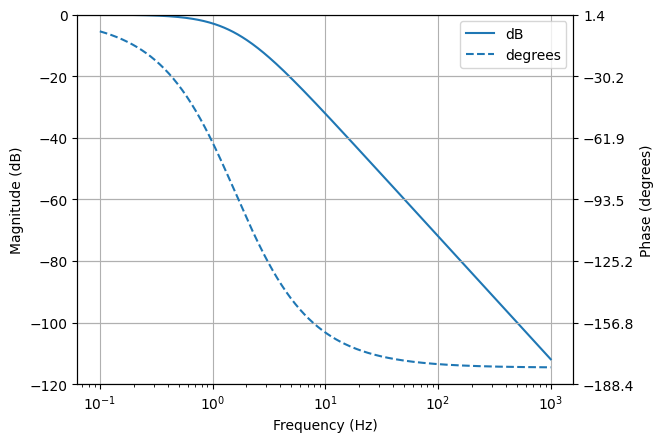

In [23]:
H(f).bode_plot((0, 1e3), plot_type='dB-degrees');

Quando os polos são complexos, $\zeta<1$, o módulo da resposta em frequência mostra oscilação em torno da frequência $\omega_n$ e o atraso de fase é abrupto. Para valores maiores de $\zeta$ as curvas são mais suaves.